In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import wordcloud

# Set a clean and minimalist style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

# Choose a soft, muted color palette
sns.set_palette('muted')

In [6]:
# all_files = [f"fetched_audiofeatures/track_data_{i}.csv" for i in range(0, 175250, 50)]
# df_list = [pd.read_csv(file) for file in all_files]
# df = pd.concat(df_list, ignore_index=True)

# df.drop_duplicates(inplace=True, subset='uri')

df = pd.read_csv("fetched_audiofeatures/uniqeutracks_audiofeatures.csv")

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

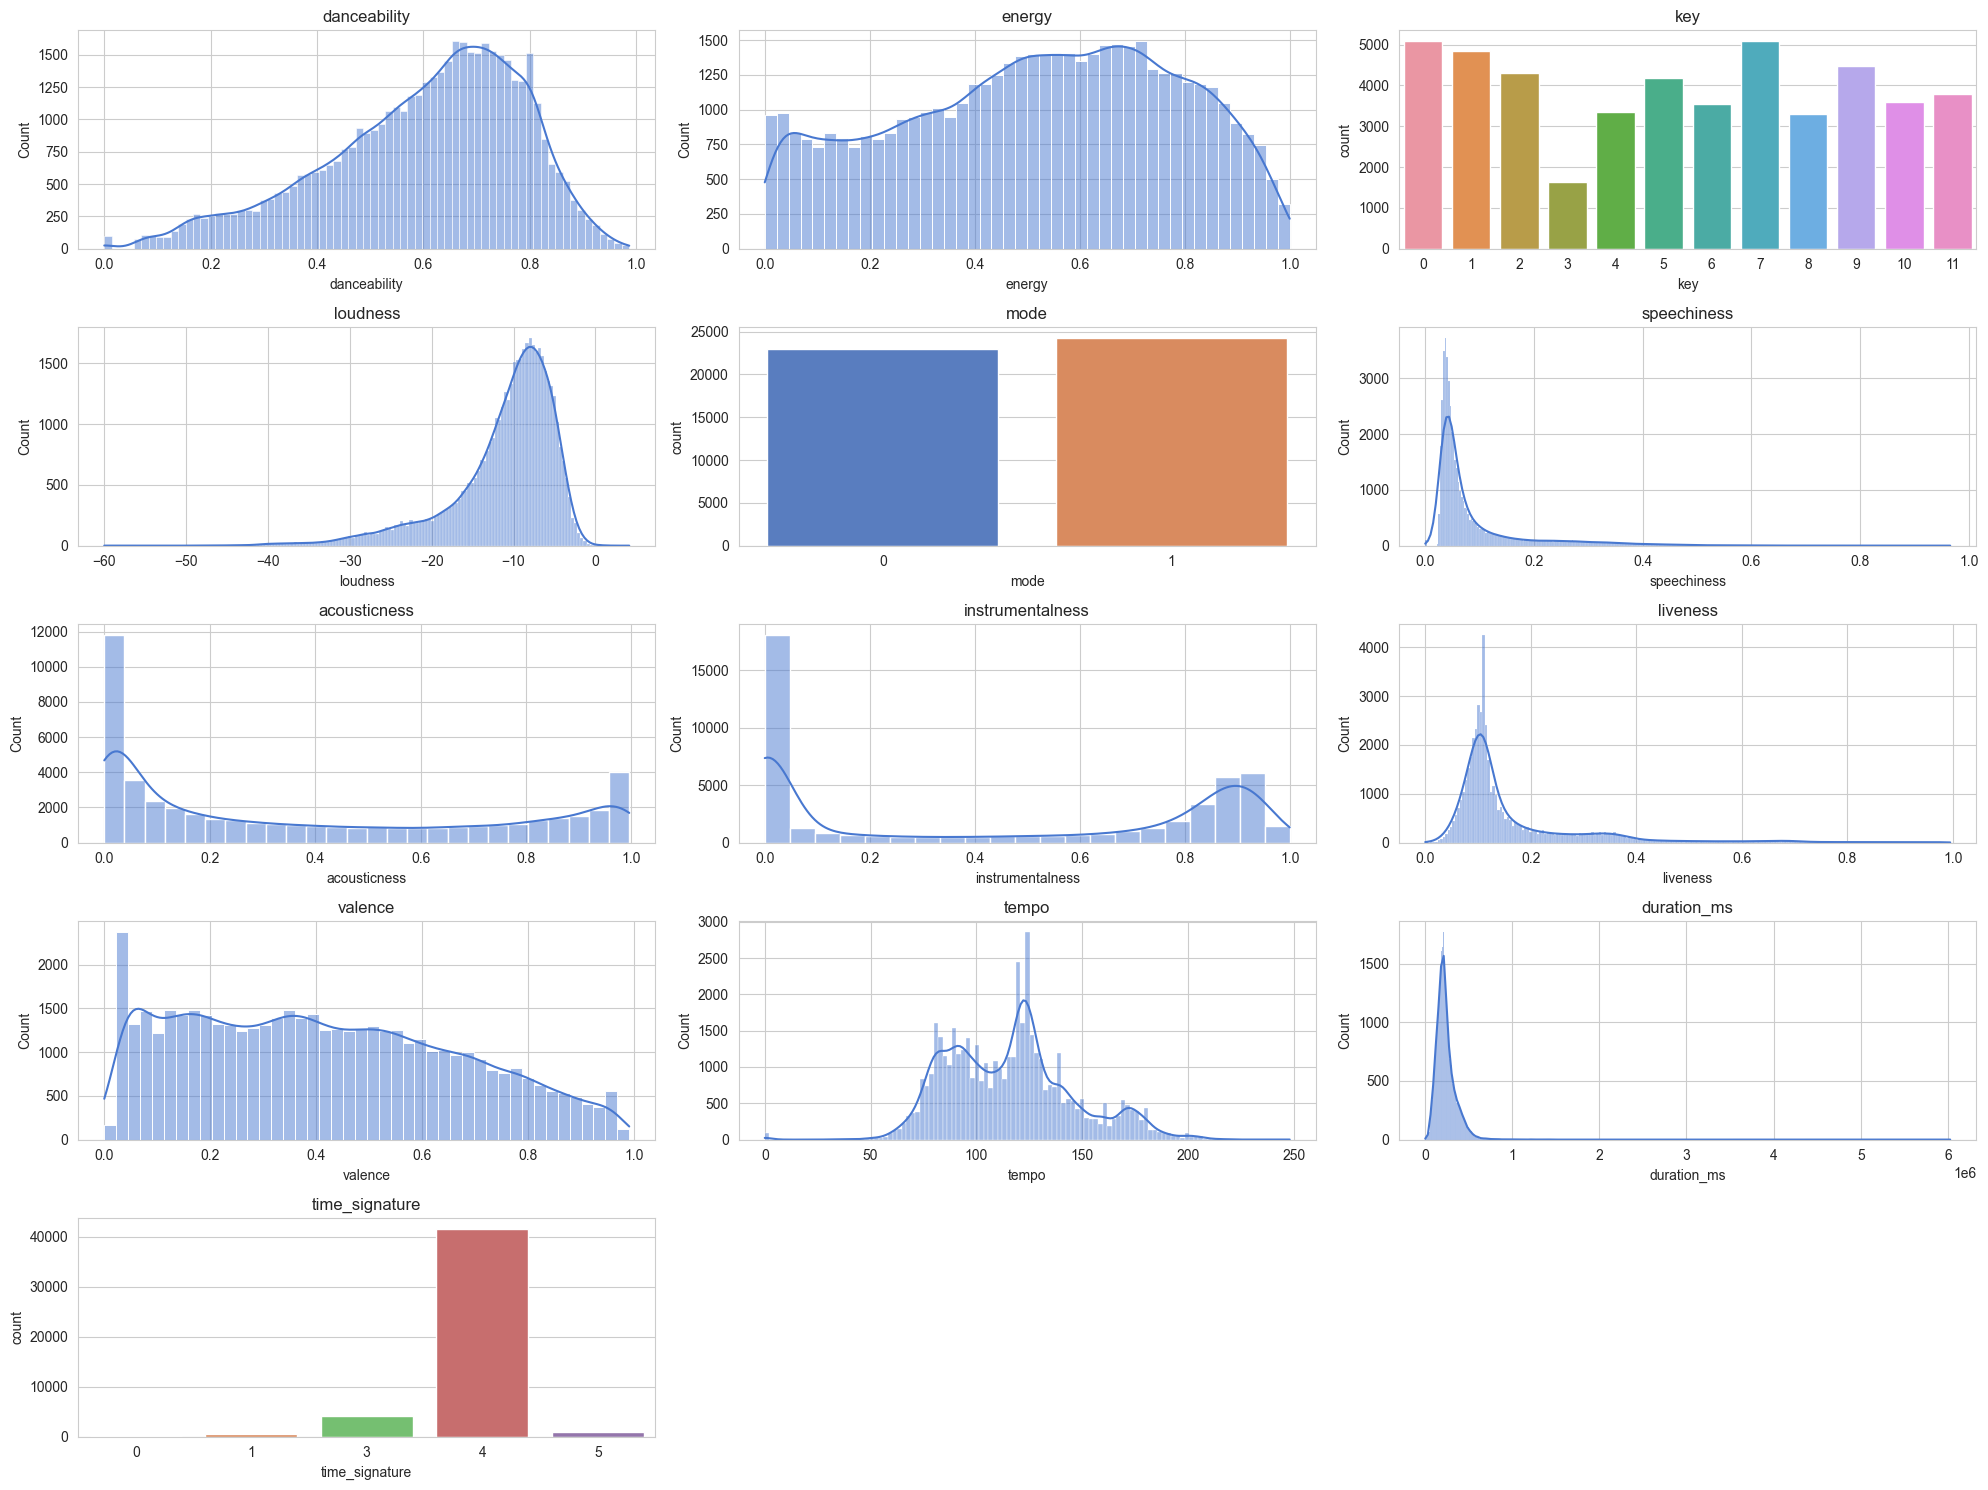

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# A list of columns to visualize
columns_to_visualize = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                        'duration_ms', 'time_signature']

# Iterate over the columns and create a subplot for each one
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(5, 3, i)
    if column in ['key', 'mode', 'time_signature']:
        # For categorical data, use countplot
        sns.countplot(x=column, data=df)
    else:
        # For numerical data, use histplot
        sns.histplot(df[column], kde=True)
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Audio Features')

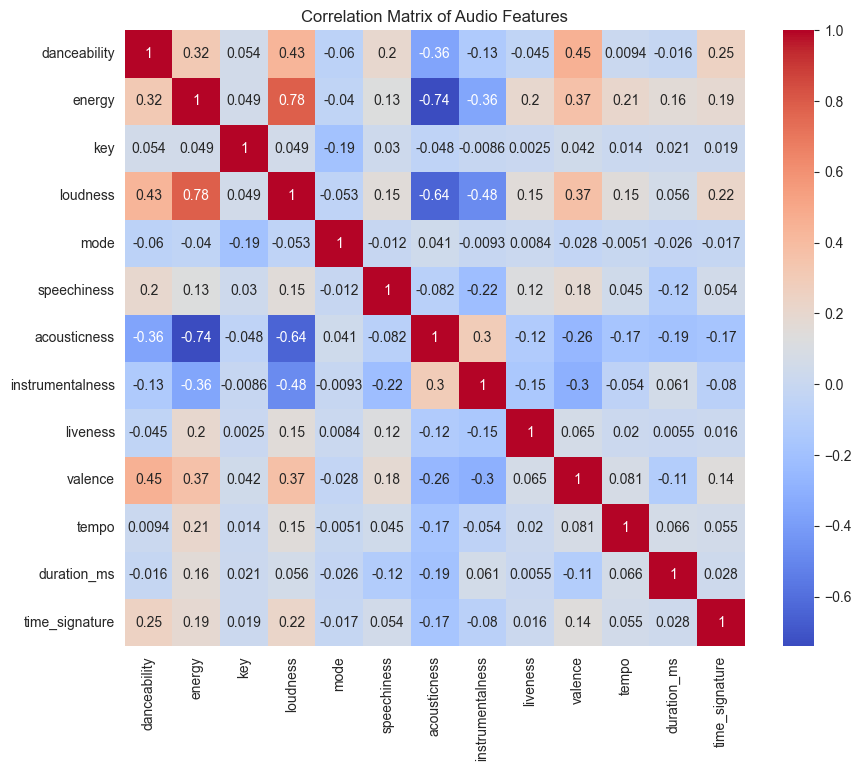

In [8]:
corr = df[columns_to_visualize].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.02, 'Pair Plot of Selected Audio Features')

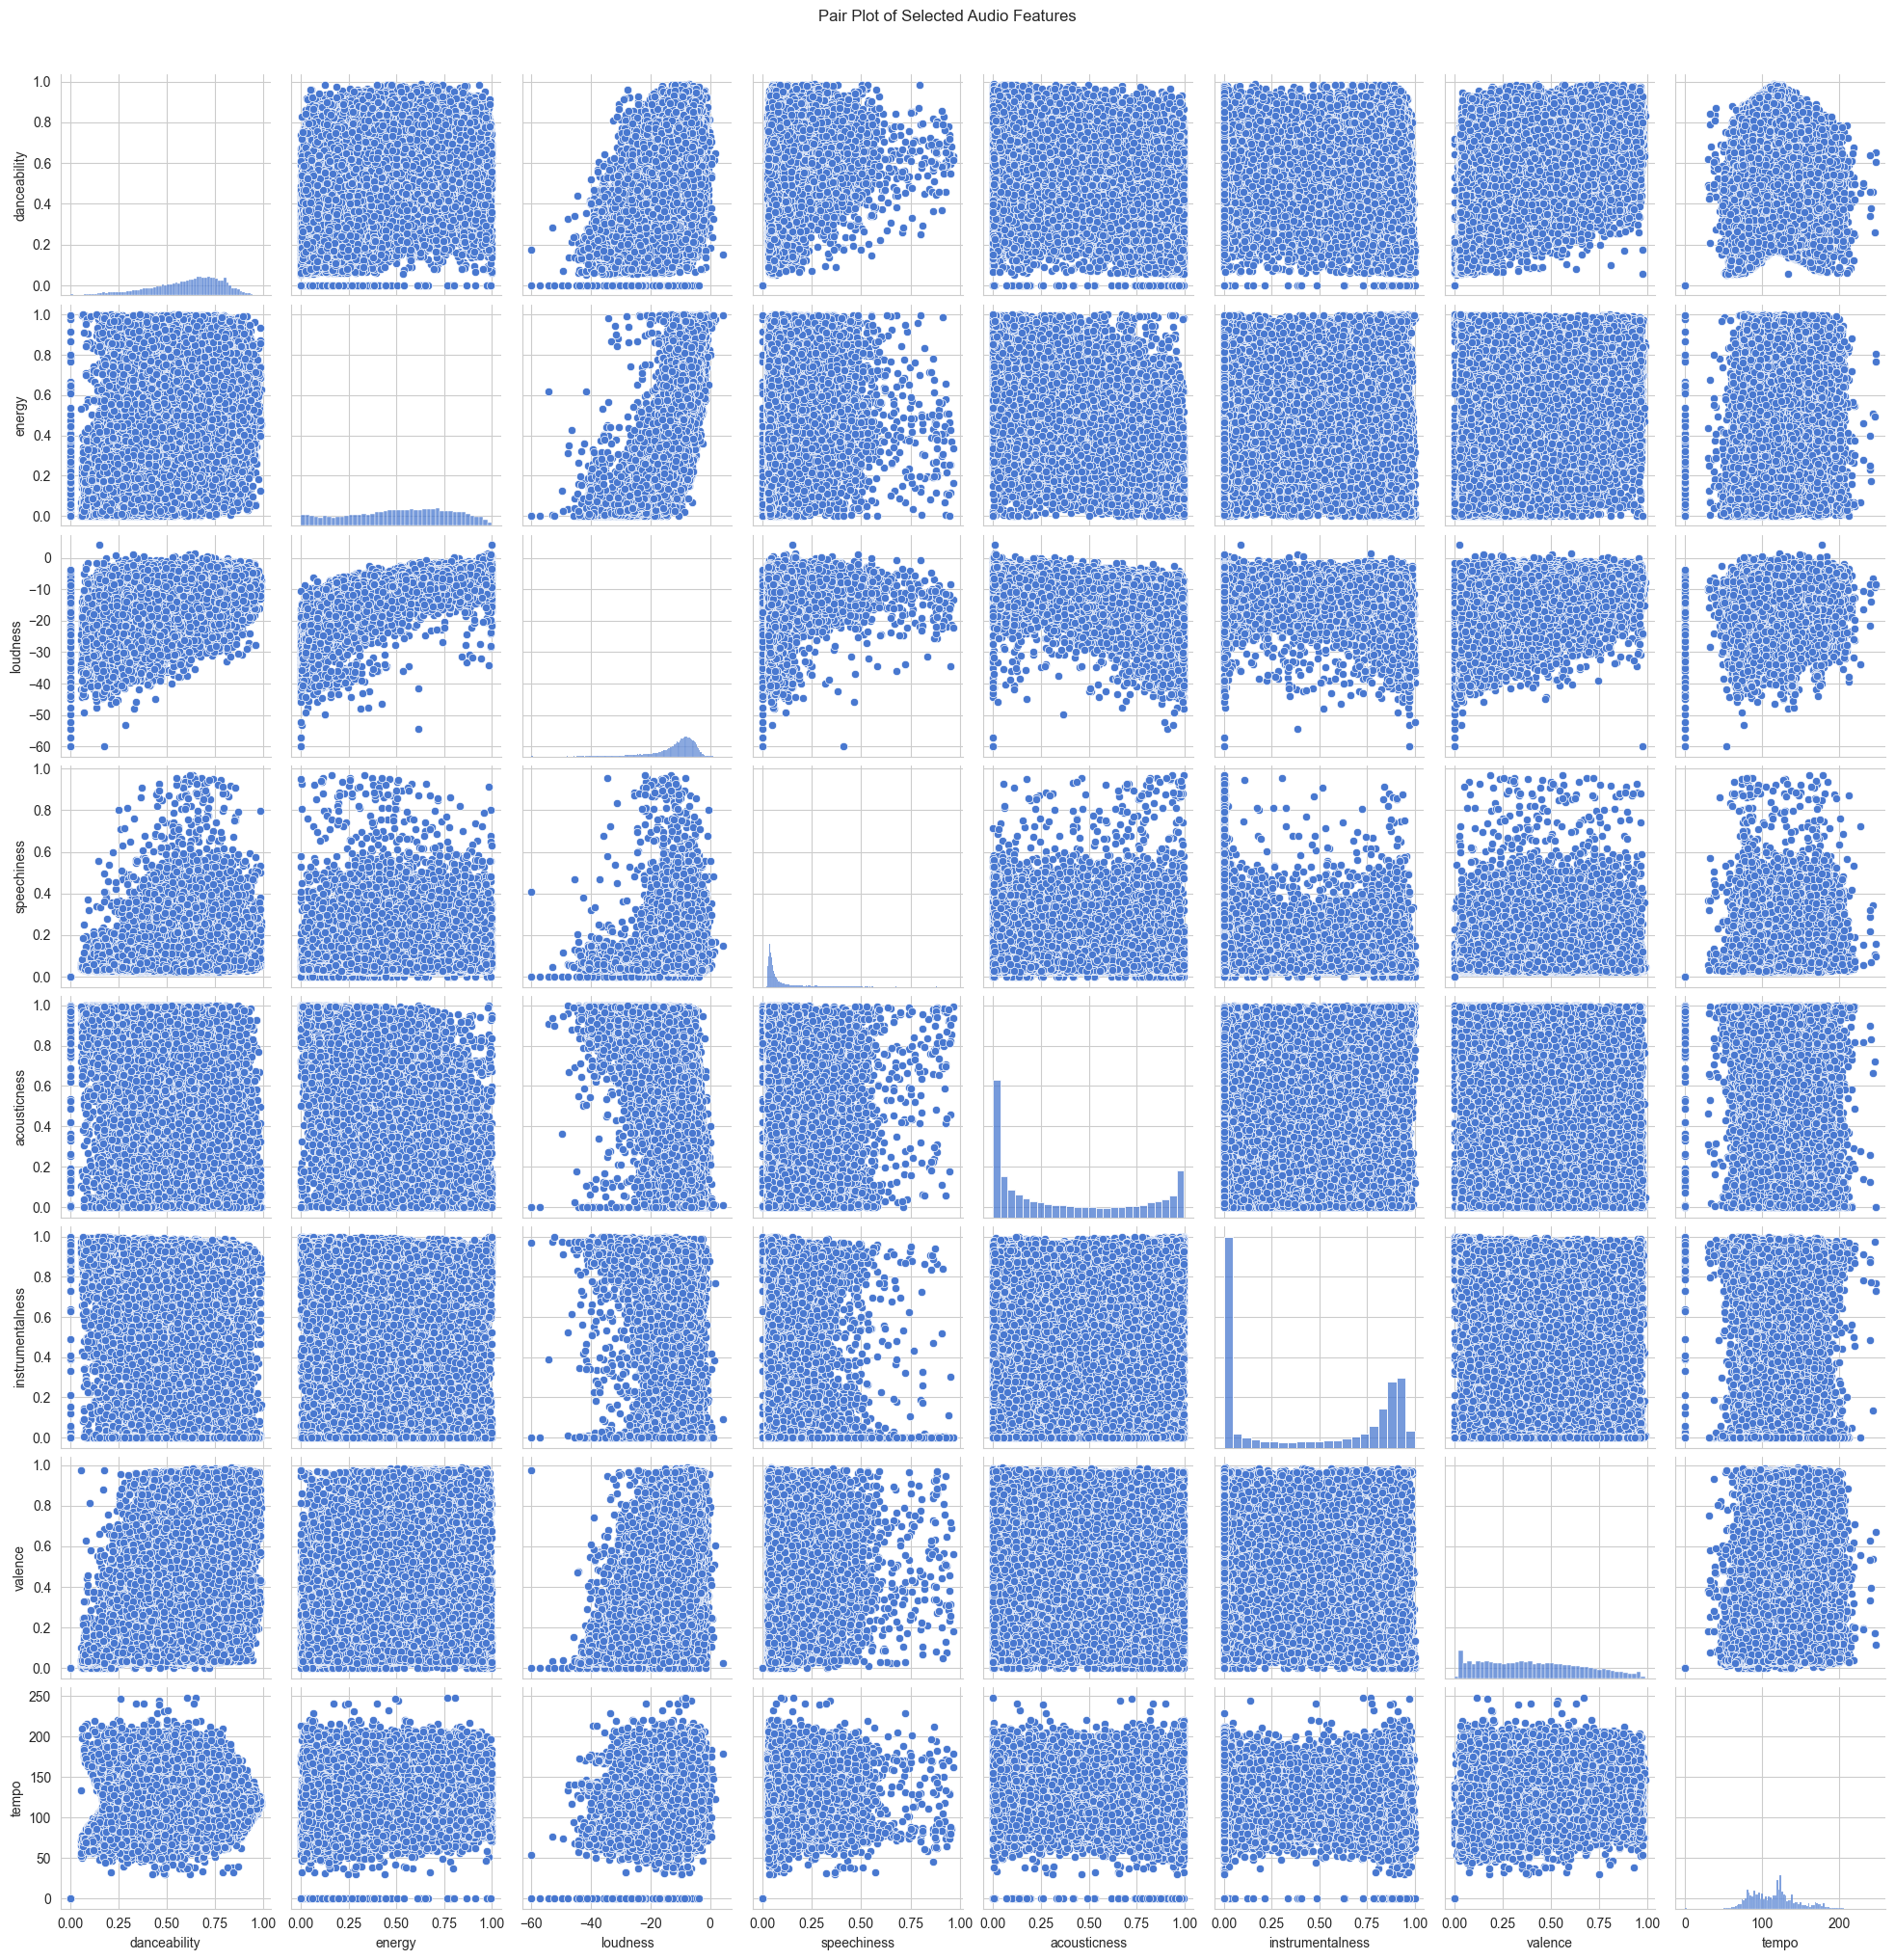

In [9]:
sns.pairplot(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])
plt.suptitle('Pair Plot of Selected Audio Features', y=1.02)

Text(0.5, 1.0, 'Energy Distribution by Musical Key')

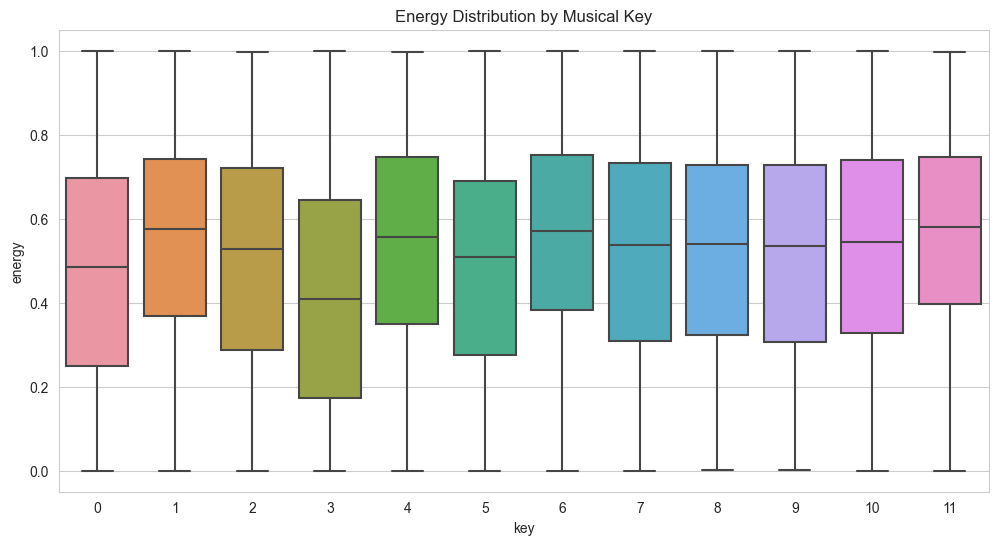

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='energy', data=df)
plt.title('Energy Distribution by Musical Key')

Text(0.5, 1.0, 'Energy Distribution by Musical Key')

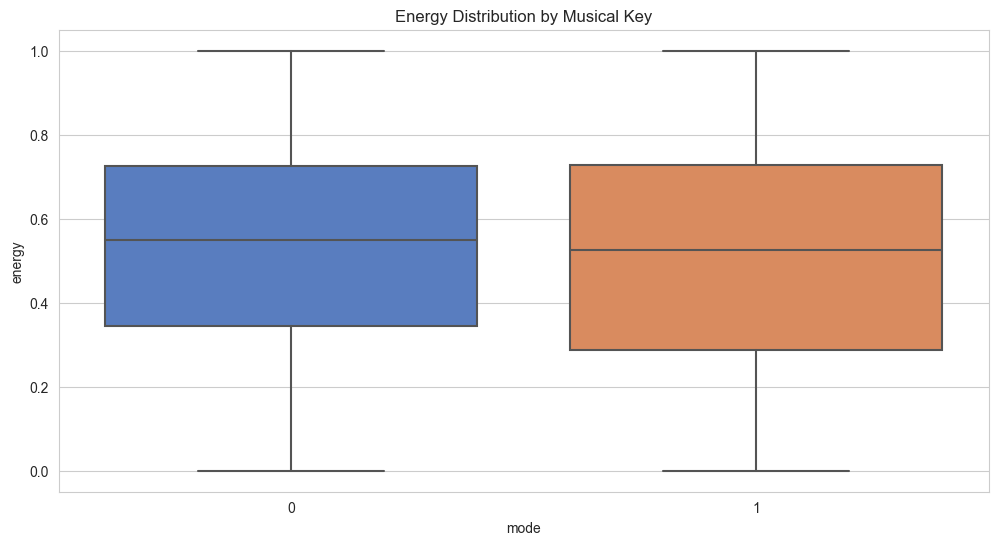

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='mode', y='energy', data=df)
plt.title('Energy Distribution by Musical Key')

Text(0.5, 1.0, 'Energy Distribution by Musical Key')

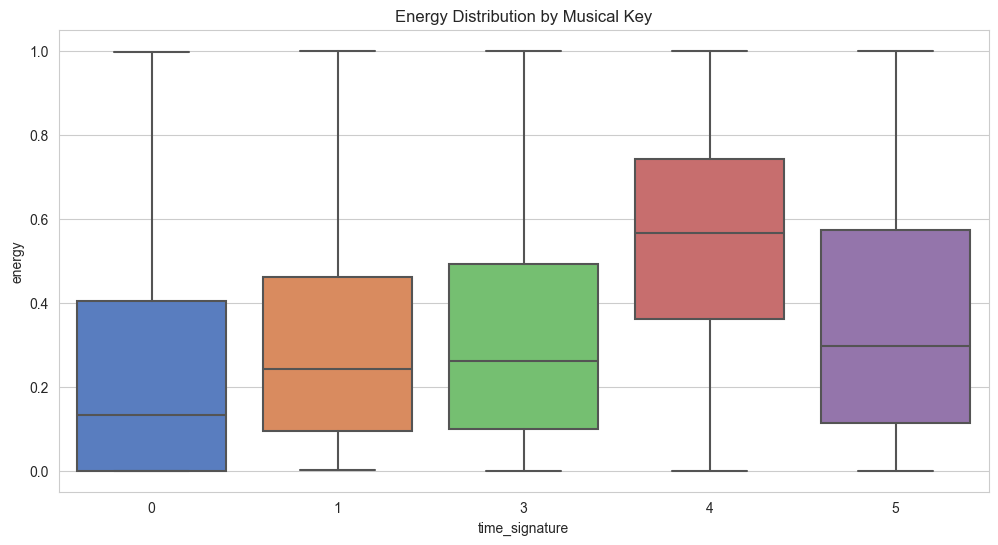

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_signature', y='energy', data=df)
plt.title('Energy Distribution by Musical Key')

Text(0.5, 1.0, 'Energy vs. Valence by Mode')

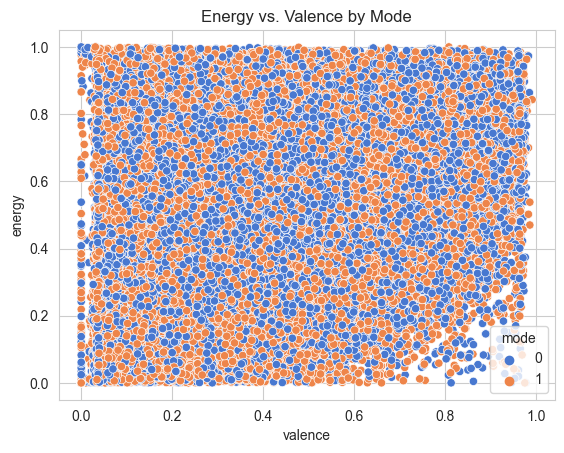

In [13]:
sns.scatterplot(x='valence', y='energy', hue='mode', data=df)
plt.title('Energy vs. Valence by Mode')

## Explore but with listening counts

In [33]:
history = pd.read_csv("data_2024/streaming_history/streamin_history_concat.csv")
counts_uri = history.groupby(by='spotify_track_uri').size()

df_freqs = pd.merge(df, counts_uri.to_frame(),
                    left_on='uri', 
                    right_index=True, 
                    how='left').rename(columns={0: 'play_count'})

/var/folders/wm/6y1bhz7x0ml90h2rz18zmclm0000gn/T/ipykernel_7434/1900901524.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  history = pd.read_csv("data_2024/streaming_history/streamin_history_concat.csv")


In [54]:
repeats = np.repeat(df_freqs.index, df_freqs['play_count'].values)

df_freqs = df_freqs.loc[repeats].reset_index(drop=True)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

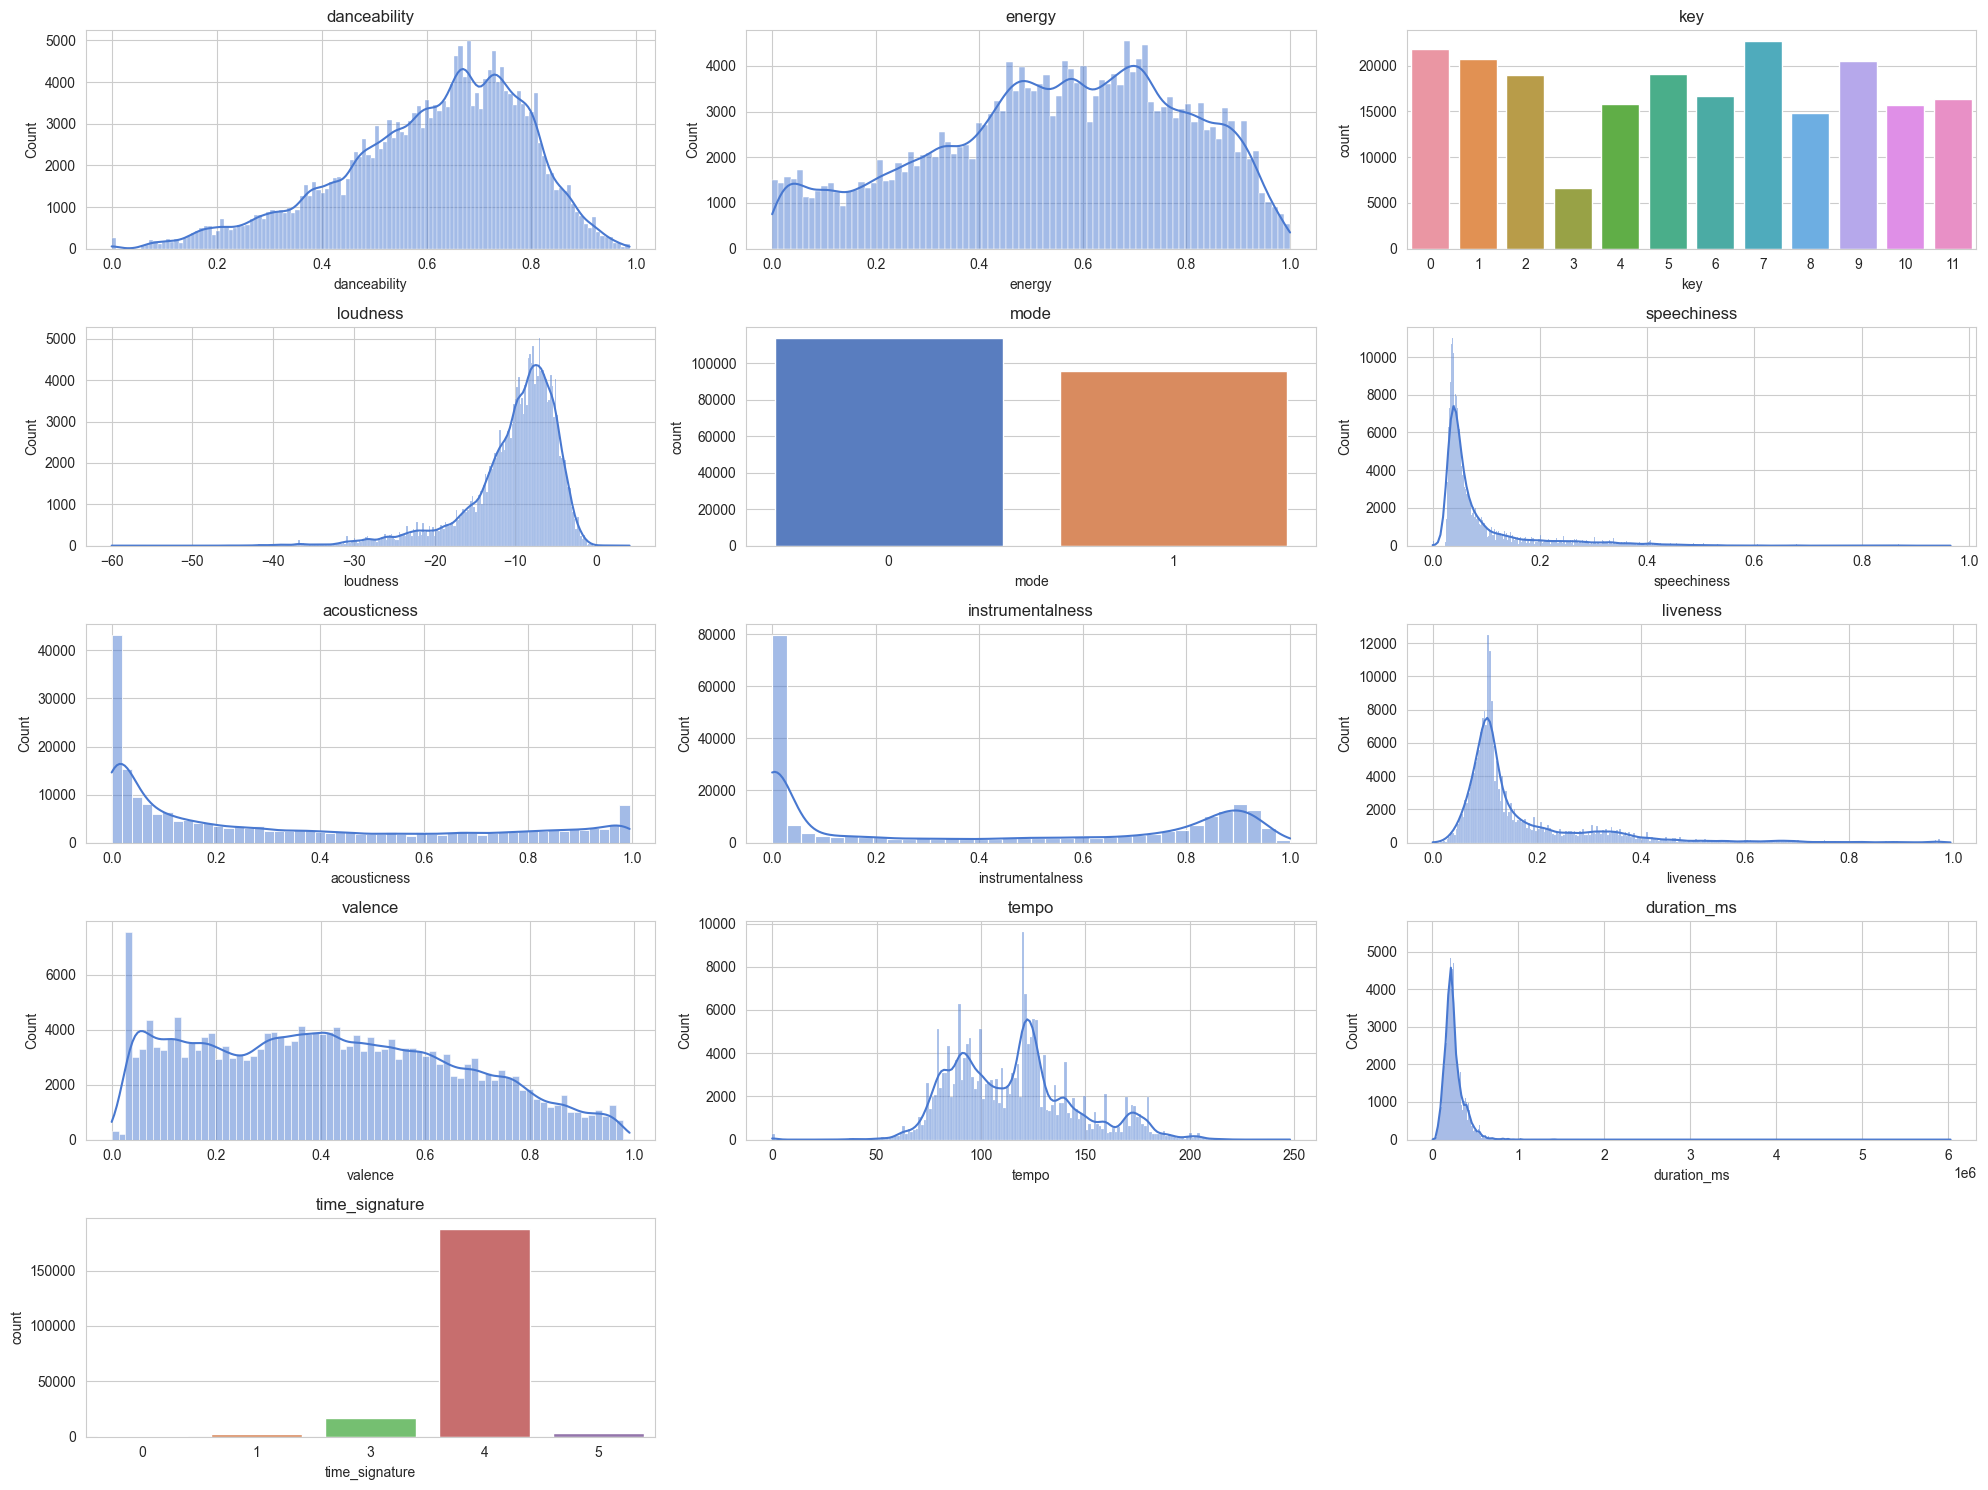

In [56]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# A list of columns to visualize
columns_to_visualize = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                        'duration_ms', 'time_signature']

# Iterate over the columns and create a subplot for each one
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(5, 3, i)
    if column in ['key', 'mode', 'time_signature']:
        # For categorical data, use countplot
        sns.countplot(x=column, data=df_freqs)
    else:
        # For numerical data, use histplot
        sns.histplot(df_freqs[column], kde=True)
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Audio Features')

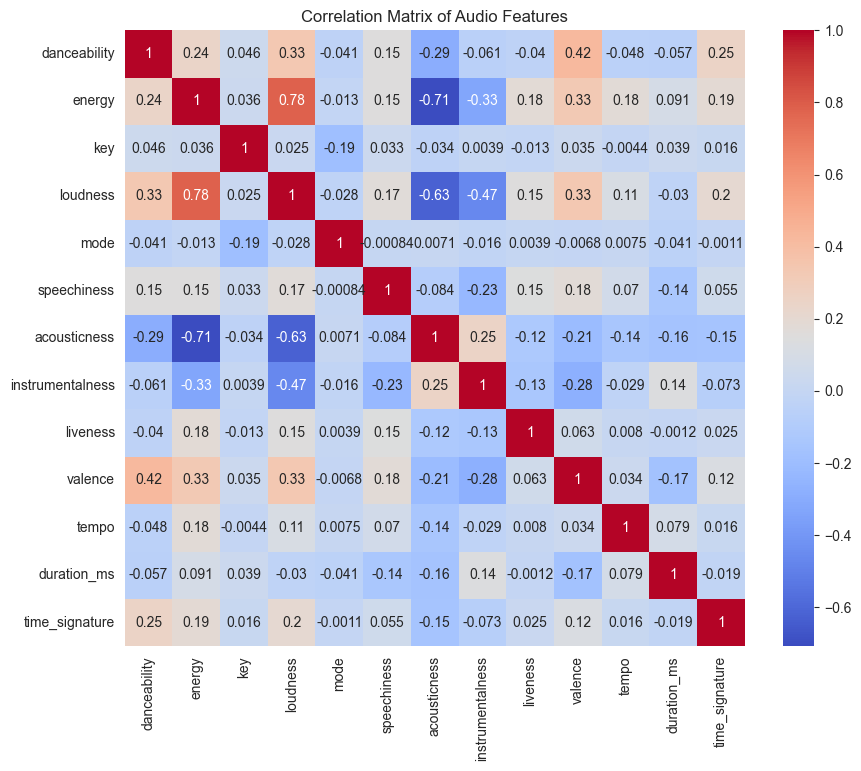

In [57]:
corr = df_freqs[columns_to_visualize].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.02, 'Pair Plot of Selected Audio Features')

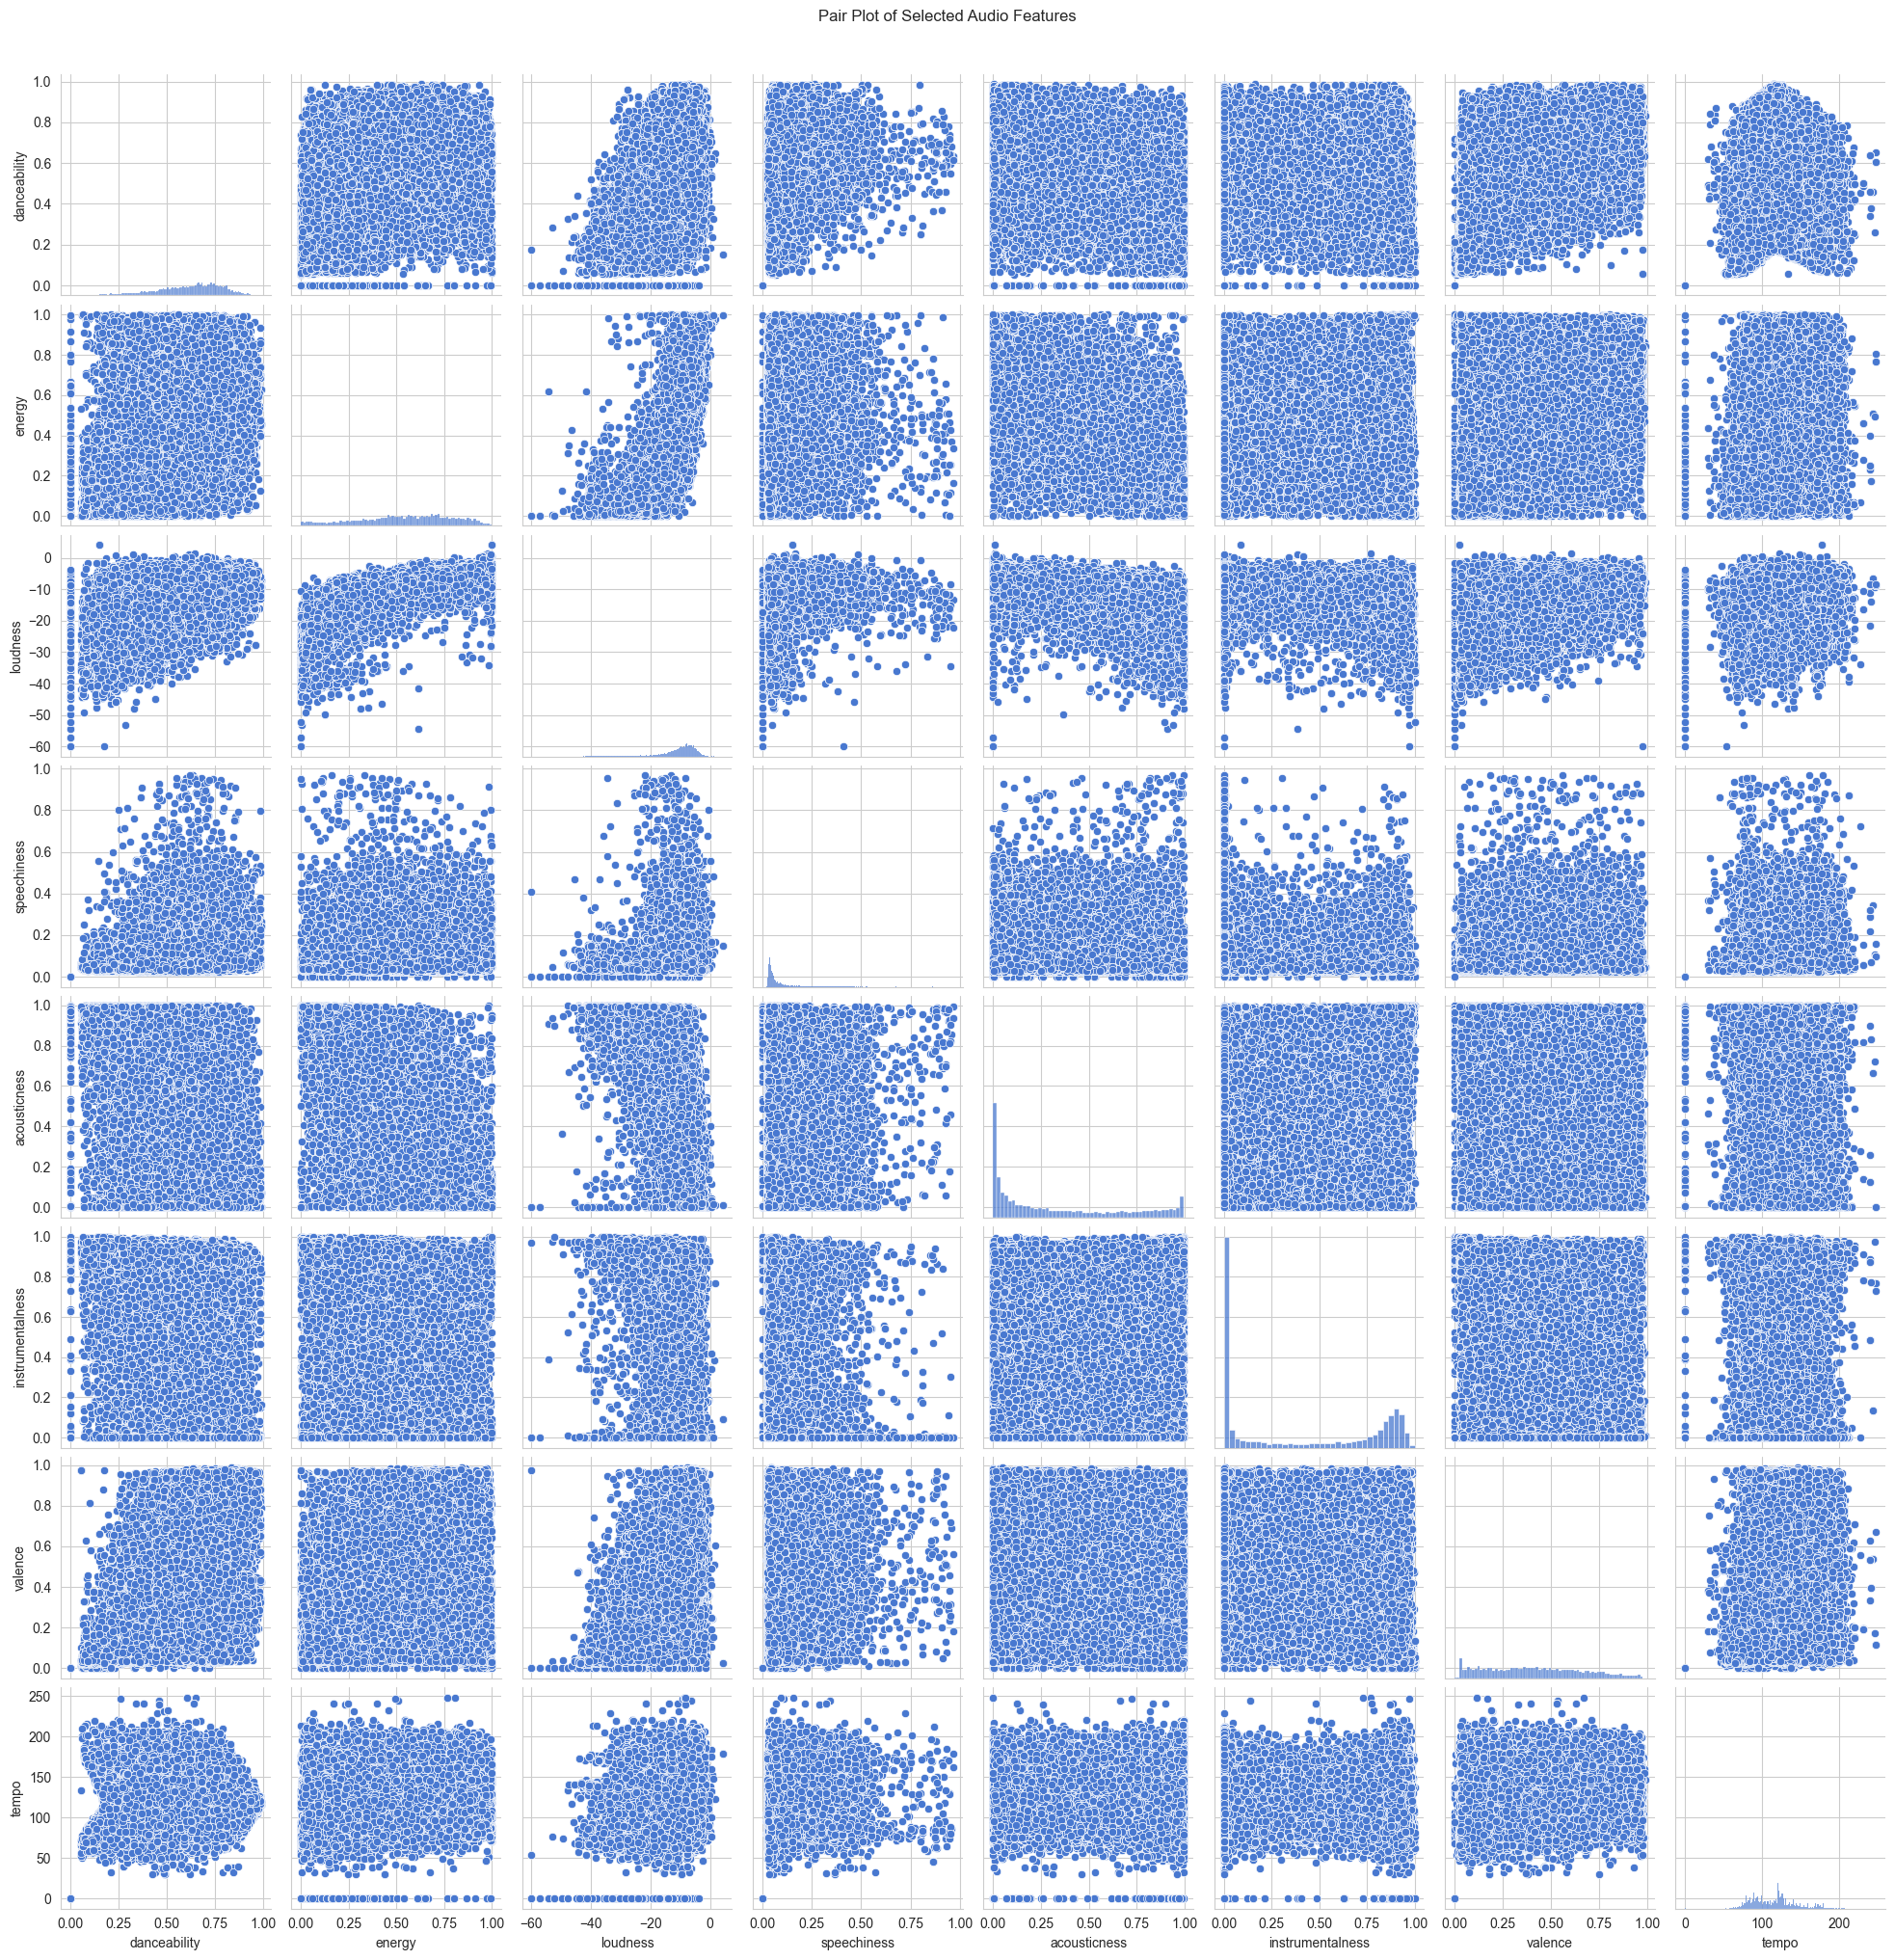

In [59]:
sns.pairplot(df_freqs[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])
plt.suptitle('Pair Plot of Selected Audio Features', y=1.02)